In [104]:
from myenv.models.candlestick import Candlestick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


candlestick = Candlestick()

bitcoin_prices = candlestick.to_df()

bitcoin_prices.describe()

bitcoin_prices['day_name'] = bitcoin_prices[['open']].apply(
    lambda x: x.name.strftime("%A"), axis=1)

total = bitcoin_prices.iloc[:,0].count()
first_date = bitcoin_prices.iloc[0].name.date()
last_date = bitcoin_prices.iloc[-1].name.date()



# GIAO DỊCH TRONG BIÊN ĐỘ


<Figure size 432x288 with 0 Axes>

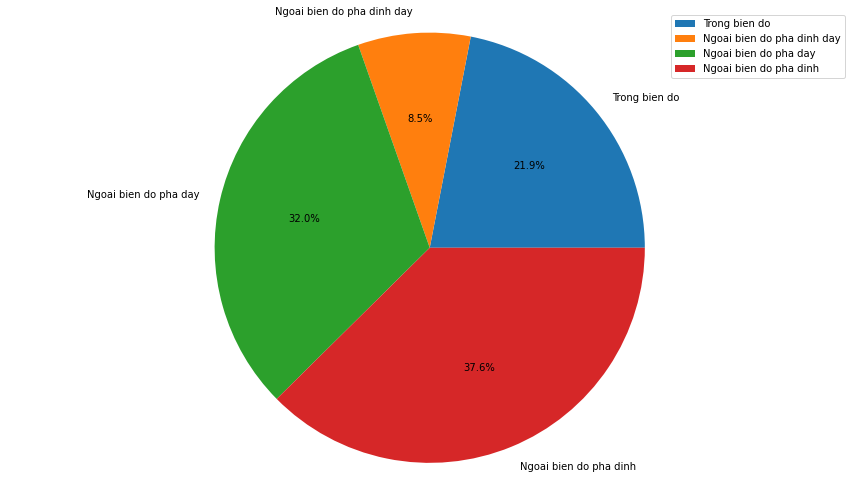

Đối với tập dự liệu giá BTC từ 2017-08-17 đến 2021-07-17, xác suất của việc mức giá cao nhất bị phá vỡ là 46.1%, mức giá thấp nhất bị phá vỡ là 40.5% và cả hai đỉnh đáy bị phá vỡ là 8.5%.
Có ít hơn 21.9% số ngày là những ngày giao dịch trong biên độ


In [101]:
data = [0]

for index in range(0, total):
    if index < 1:
        continue
    
    # trong biên độ
    inside_bar_type = 0
    current_row = bitcoin_prices.iloc[index]
    previous_row = bitcoin_prices.iloc[index - 1]

    if current_row['low'] < previous_row['low'] and current_row['high'] > previous_row['high']:
        # Ngoài biên độ phá vỡ đỉnh và dáy
        inside_bar_type = 1
    elif current_row['low'] < previous_row['low']:
        # Ngoài biên độ phá vỡ dáy
        inside_bar_type = 2
    elif current_row['high'] > previous_row['high']:
        # Ngoài biên độ phá vỡ đỉnh
        inside_bar_type = 3

    data.append(inside_bar_type)

bitcoin_prices['inside_bar_type'] = data

group_inside_bar_type = bitcoin_prices.groupby(
    'inside_bar_type').inside_bar_type.count()

labels = 'Trong bien do', 'Ngoai bien do pha dinh day', 'Ngoai bien do pha day', 'Ngoai bien do pha dinh'
sizes = [group_inside_bar_type.loc[0],
         group_inside_bar_type.loc[1], group_inside_bar_type.loc[2], group_inside_bar_type.loc[3]]

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

probability_break_high = '{:.1%}'.format((group_inside_bar_type.loc[3] +
                                          group_inside_bar_type.loc[1])/total)
probability_break_low = '{:.1%}'.format((group_inside_bar_type.loc[2] +
                                         group_inside_bar_type.loc[1])/total)
probability_break_both = '{:.1%}'.format(group_inside_bar_type.loc[1]/total)
probability_inside_day = '{:.1%}'.format(group_inside_bar_type.loc[0]/total)

print(
    f"Đối với tập dự liệu giá BTC từ {first_date} đến {last_date}, xác suất của việc mức giá cao nhất bị phá vỡ là {probability_break_high}, mức giá thấp nhất bị phá vỡ là {probability_break_low} và cả hai đỉnh đáy bị phá vỡ là {probability_break_both}.")
print(
    f"Có ít hơn {probability_inside_day} số ngày là những ngày giao dịch trong biên độ")


# HIỆU ỨNG NGÀY TRONG TUẦN VÀ HÀNH VI THỊ TRƯỜNG

In [109]:
import datetime

candlestick_week = Candlestick(interval="week")

bitcoin_prices_week = candlestick_week.to_df()

bitcoin_prices_week.describe()

bitcoin_prices_week['end_week'] = bitcoin_prices_week[['high']].apply(
    lambda x: x.name.date() + datetime.timedelta(days=6), axis=1)

total_week = bitcoin_prices_week.iloc[:,1].count()

bitcoin_prices[bitcoin_prices_week.iloc[0].name.strftime(
    "%Y-%m-%d"):"2018-11-02"]

def min_low_in_week(x):
    df_week = bitcoin_prices[x.name.strftime("%Y-%m-%d"):x['end_week'].strftime("%Y-%m-%d")]
    return df_week[df_week.low == df_week.low.min()].iloc[0, 4]


def max_high_in_week(x):
    df_week = bitcoin_prices[x.name.strftime(
        "%Y-%m-%d"):x['end_week'].strftime("%Y-%m-%d")]
    return df_week[df_week.high == df_week.high.max()].iloc[0, 4]


bitcoin_prices_week['min_low_in_week'] = bitcoin_prices_week[[
    'end_week']].apply(lambda x: min_low_in_week(x), axis=1)

bitcoin_prices_week['max_high_in_week'] = bitcoin_prices_week[[
    'end_week']].apply(lambda x: max_high_in_week(x), axis=1)

group_min_low_in_week = bitcoin_prices_week.groupby(
    'min_low_in_week').min_low_in_week.count()

group_max_high_in_week = bitcoin_prices_week.groupby(
    'max_high_in_week').max_high_in_week.count()

print(group_min_low_in_week)
print(group_max_high_in_week)


min_low_in_week
Friday       23
Monday       71
Saturday      9
Sunday       29
Thursday     26
Tuesday      26
Wednesday    20
Name: min_low_in_week, dtype: int64
max_high_in_week
Friday       19
Monday       59
Saturday     29
Sunday       38
Thursday     16
Tuesday      21
Wednesday    22
Name: max_high_in_week, dtype: int64


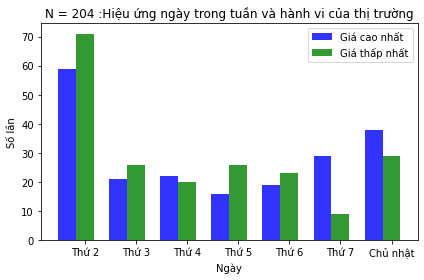

Đối với tập dự liệu giá BTC từ 2017-08-17 đến 2021-07-17, Thứ hai là ngày giao dịch biến động nhất tuần:
- 28.9% các ngày thứ hai đã thiết lập mức giá cao nhất tuần
- 34.8% các ngày thứ hai đã thiết lập mức giá thấp nhất tuần
Trong số 204 tuần của bộ dữ liệu này, ngày thứ 2 thiết lập mức giá cao nhất hoặc thấp nhất là 130 lần, tức là chiếm 31.9%


In [113]:
n_groups = 7
min_low_in_week = (
    group_min_low_in_week['Monday'],
    group_min_low_in_week['Tuesday'],
    group_min_low_in_week['Wednesday'],
    group_min_low_in_week['Thursday'],
    group_min_low_in_week['Friday'],
    group_min_low_in_week['Saturday'],
    group_min_low_in_week['Sunday']
)
max_high_in_week = (
    group_max_high_in_week['Monday'],
    group_max_high_in_week['Tuesday'],
    group_max_high_in_week['Wednesday'],
    group_max_high_in_week['Thursday'],
    group_max_high_in_week['Friday'],
    group_max_high_in_week['Saturday'],
    group_max_high_in_week['Sunday']
)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, max_high_in_week, bar_width,
                 alpha=opacity, color='b', label='Giá cao nhất')

rects2 = plt.bar(index + bar_width, min_low_in_week, bar_width,
                 alpha=opacity, color='g', label='Giá thấp nhất')

plt.xlabel('Ngày')
plt.ylabel('Số lần')
plt.title(
    f"N = {total_week} :Hiệu ứng ngày trong tuần và hành vi của thị trường")
plt.xticks(index + bar_width, ('Thứ 2', 'Thứ 3',
                               'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ nhật'))
plt.legend()
plt.tight_layout()
plt.show()

monday_high_low_prices = bitcoin_prices_week[(bitcoin_prices_week.min_low_in_week == 'Monday') & (
    bitcoin_prices_week.max_high_in_week == 'Monday')]

probability_monday_establish_high = '{:.1%}'.format(
    group_max_high_in_week['Monday']/total_week)
probability_monday_establish_low = '{:.1%}'.format(
    group_min_low_in_week['Monday']/total_week)
probability_monday_establish_high_or_low = '{:.1%}'.format(
    (group_min_low_in_week['Monday'] + group_max_high_in_week['Monday'])/(2*total_week))

print(
    f"Đối với tập dự liệu giá BTC từ {first_date} đến {last_date}, Thứ hai là ngày giao dịch biến động nhất tuần:")
print(f"- {probability_monday_establish_high} các ngày thứ hai đã thiết lập mức giá cao nhất tuần")
print(f"- {probability_monday_establish_low} các ngày thứ hai đã thiết lập mức giá thấp nhất tuần")
print(
    f"Trong số {total_week} tuần của bộ dữ liệu này, ngày thứ hai thiết lập mức giá cao nhất hoặc thấp nhất là {group_max_high_in_week['Monday'] + group_min_low_in_week['Monday']} lần, tức là chiếm {probability_monday_establish_high_or_low}")
print(f"Có {monday_high_low_prices.iloc[:,0].count()} ngày thứ hai vừa thiêt lập cả mức giá cao nhất và thâp nhất trong tuần.")


### Câu hỏi
Nếu ngày thứ hai là ngày thiết lập mức giá thấp nhất hoặc cao nhất của tuần thì ngày nào điều kiện nghịch đảo dễ xảy ra nhất?

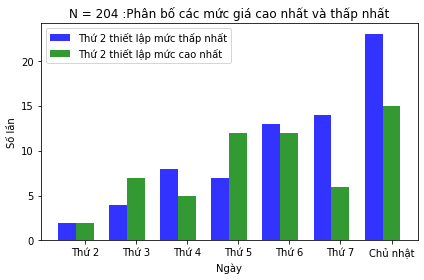

In [127]:
monday_lowest_prices = bitcoin_prices_week[(
    bitcoin_prices_week.min_low_in_week == 'Monday')]

group_monday_lowest_prices = monday_lowest_prices.groupby(
    'max_high_in_week').max_high_in_week.count()

monday_highest_prices = bitcoin_prices_week[(
    bitcoin_prices_week.max_high_in_week == 'Monday')]

group_monday_highest_prices = monday_highest_prices.groupby(
    'min_low_in_week').min_low_in_week.count()


n_groups = 7
monday_min_low_in_week = (
    group_monday_lowest_prices['Monday'],
    group_monday_lowest_prices['Tuesday'],
    group_monday_lowest_prices['Wednesday'],
    group_monday_lowest_prices['Thursday'],
    group_monday_lowest_prices['Friday'],
    group_monday_lowest_prices['Saturday'],
    group_monday_lowest_prices['Sunday']
)
monday_max_high_in_week = (
    group_monday_highest_prices['Monday'],
    group_monday_highest_prices['Tuesday'],
    group_monday_highest_prices['Wednesday'],
    group_monday_highest_prices['Thursday'],
    group_monday_highest_prices['Friday'],
    group_monday_highest_prices['Saturday'],
    group_monday_highest_prices['Sunday']
)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, monday_min_low_in_week, bar_width,
                 alpha=opacity, color='b', label='Thứ 2 thiết lập mức thấp nhất')

rects2 = plt.bar(index + bar_width, monday_max_high_in_week, bar_width,
                 alpha=opacity, color='g', label='Thứ 2 thiết lập mức cao nhất')

plt.xlabel('Ngày')
plt.ylabel('Số lần')
plt.title(
    f"N = {total_week} :Phân bố các mức giá cao nhất và thấp nhất")
plt.xticks(index + bar_width, ('Thứ 2', 'Thứ 3',
                               'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ nhật'))
plt.legend()
plt.tight_layout()
plt.show()


In [128]:
print(group_monday_lowest_prices)


max_high_in_week
Friday       13
Monday        2
Saturday     14
Sunday       23
Thursday      7
Tuesday       4
Wednesday     8
Name: max_high_in_week, dtype: int64


### KẾT LUẬN
Néu mua vào ngày thứ hai trong xu hướng giảm giá, chúng ta sẽ dễ mua được giá thấp nhất trong tuần. Khi đã mua ở ngày thứ 2 khi nó đang thiết lập mức giá thấp nhất trong tuần thì ta nên bán ra vào ngày chủ nhật để có được lợi nhuận cao nhất.